## Esercizio 11.2 ##

In [485]:
import numpy as np

b = 4
m1 = -3
m2 = -2
m3 = 3

np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 2000)
x_valid.sort()
y_target = b + m1 * x_valid + m2 * (x_valid)**2 + m3 * (x_valid)**3 

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(b + m1 * x_train + m2 * (x_train)**2 + m3 * (x_train)**3, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(b + m1 * x_valid + m2 * (x_valid)**2 + m3 * (x_valid)**3 , sigma)

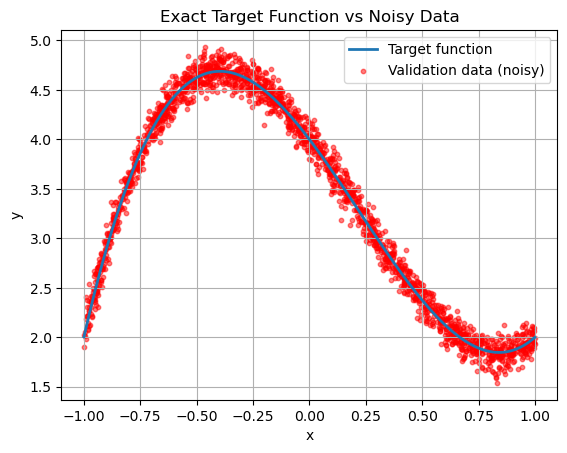

In [487]:
import matplotlib.pyplot as plt

x_valid_sorted = np.sort(x_valid)
y_target_sorted = b + m1 * x_valid_sorted + m2 * x_valid_sorted**2 + m3 * x_valid_sorted**3

plt.plot(x_valid_sorted, y_target_sorted, label='Target function', linewidth=2)
plt.scatter(x_valid, y_valid, color='red', s=10, alpha=0.5, label='Validation data (noisy)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Exact Target Function vs Noisy Data")
plt.legend()
plt.grid(True)
plt.show()

In [489]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()
model.add(Dense(128, input_shape=(1,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_118 (Dense)               │ (None, 128)            │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [491]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 2.1778 - mse: 2.1778 - val_loss: 0.0709 - val_mse: 0.0709
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0532 - mse: 0.0532 - val_loss: 0.0223 - val_mse: 0.0223
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 0.0119 - val_mse: 0.0119
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0118 - val_mse: 0.0118
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0114 - val_mse: 0.0114
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/

In [493]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0115 - mse: 0.0115 

Test loss: 0.011216283775866032
Test accuracy: 0.011216283775866032


In [495]:
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0013e-04 - mse: 8.0013e-04 

Test loss: 0.0010411504190415144
Test accuracy: 0.0010411504190415144


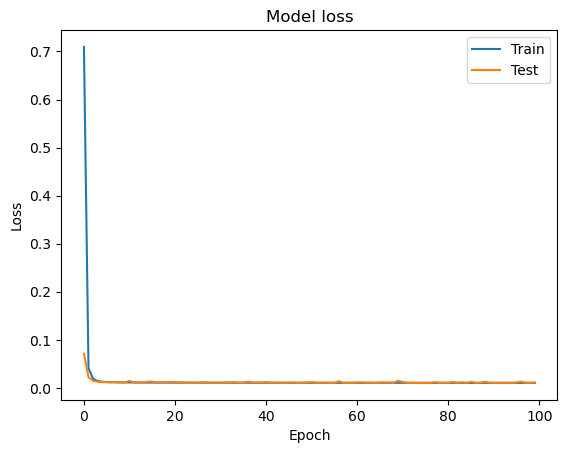

In [497]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


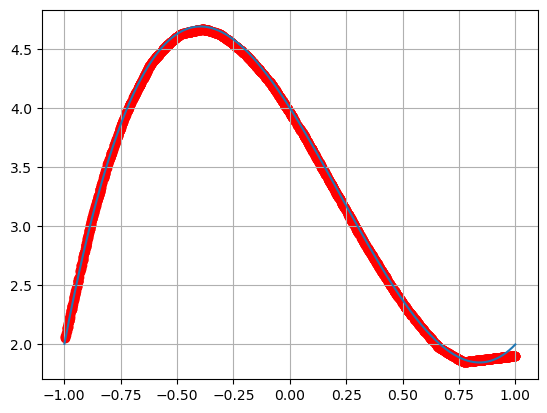

In [501]:
x_predicted = np.random.uniform(-1, 1, 2000)
y_predicted = model.predict(x_predicted)

#x_predicted_out = np.random.uniform(-2, -1, 10)
#y_predicted_out = model.predict(x_predicted_out)

plt.scatter(x_predicted, y_predicted,color='r')
#plt.scatter(x_predicted_out, y_predicted_out, color='g')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

## Esercizio 11.3 ##

In [346]:
x_t = np.random.uniform(-3./2., 3./2., size=(10000,2)) 
x_v = np.random.uniform(-3./2., 3./2., size=(2000,2)) 
y_tar = np.sin(x_t[:,0]**2+x_t[:,1]**2)

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_t = np.random.normal(np.sin(x_t[:,0]**2+x_t[:,1]**2), sigma) # actual measures from which we want to guess regression parameters
y_v = np.random.normal(np.sin(x_v[:,0]**2+x_v[:,1]**2), sigma)

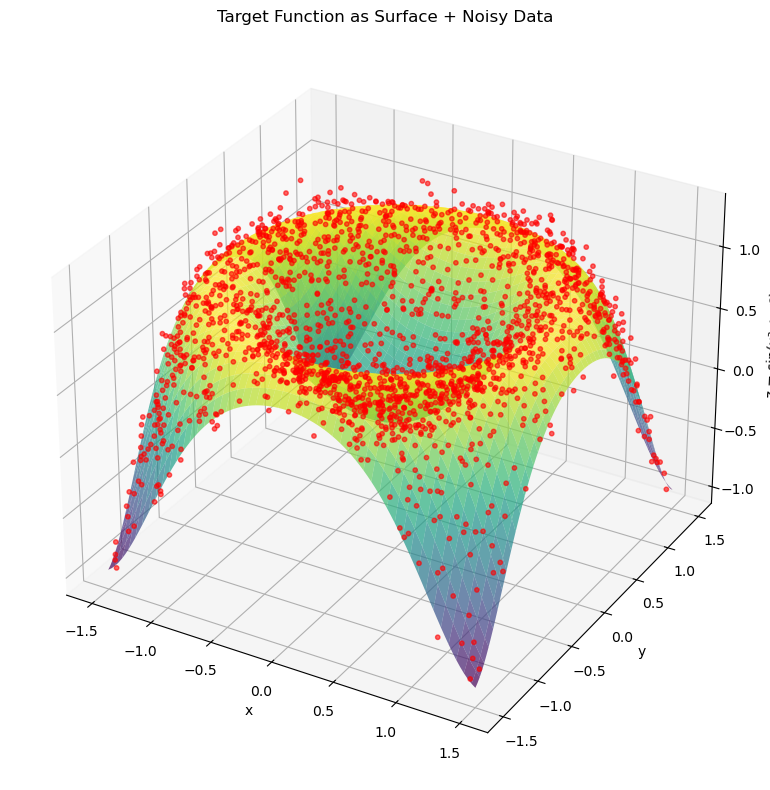

In [348]:
grid_x, grid_y = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
grid_z = np.sin(grid_x**2 + grid_y**2)

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie continua (funzione target)
ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', alpha=0.7, edgecolor='none', label='Target function')

# Scatter dati di training
#ax.scatter(x_t[:, 0], x_t[:, 1], y_t, color='blue', s=10, alpha=0.5, label='Training data')

# Scatter dati di validazione
ax.scatter(x_v[:, 0], x_v[:, 1], y_v, color='red', s=10, alpha=0.6, label='Validation data')

# Etichette
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z = sin(x² + y²)')
ax.set_title('Target Function as Surface + Noisy Data')
plt.tight_layout()

In [350]:

model1 = Sequential()
model1.add(Dense(128, input_shape=(2,), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1,))

model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model1.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [352]:
history1 = model1.fit(
    x=x_t, y=y_t,
    batch_size=32,
    epochs=100,
    shuffle=True,
    validation_data=(x_v, y_v)
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2167 - mse: 0.2167 - val_loss: 0.1275 - val_mse: 0.1275
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1283 - mse: 0.1283 - val_loss: 0.1177 - val_mse: 0.1177
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1199 - mse: 0.1199 - val_loss: 0.1068 - val_mse: 0.1068
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1069 - mse: 0.1069 - val_loss: 0.0964 - val_mse: 0.0964
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0954 - mse: 0.0954 - val_loss: 0.0845 - val_mse: 0.0845
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0871 - mse: 0.0871 - val_loss: 0.0730 - val_mse: 0.0730
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0579 - mse: 0.0579 - val_loss: 0.0487 - val_mse: 0.0487
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/

In [358]:
score1 = model1.evaluate(x_v, y_v, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104 - mse: 0.0104 

Test loss: 9.448735363548622e-05
Test accuracy: 9.448735363548622e-05


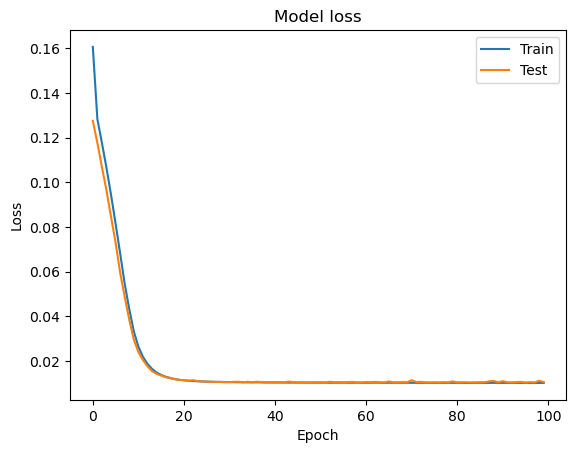

In [360]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


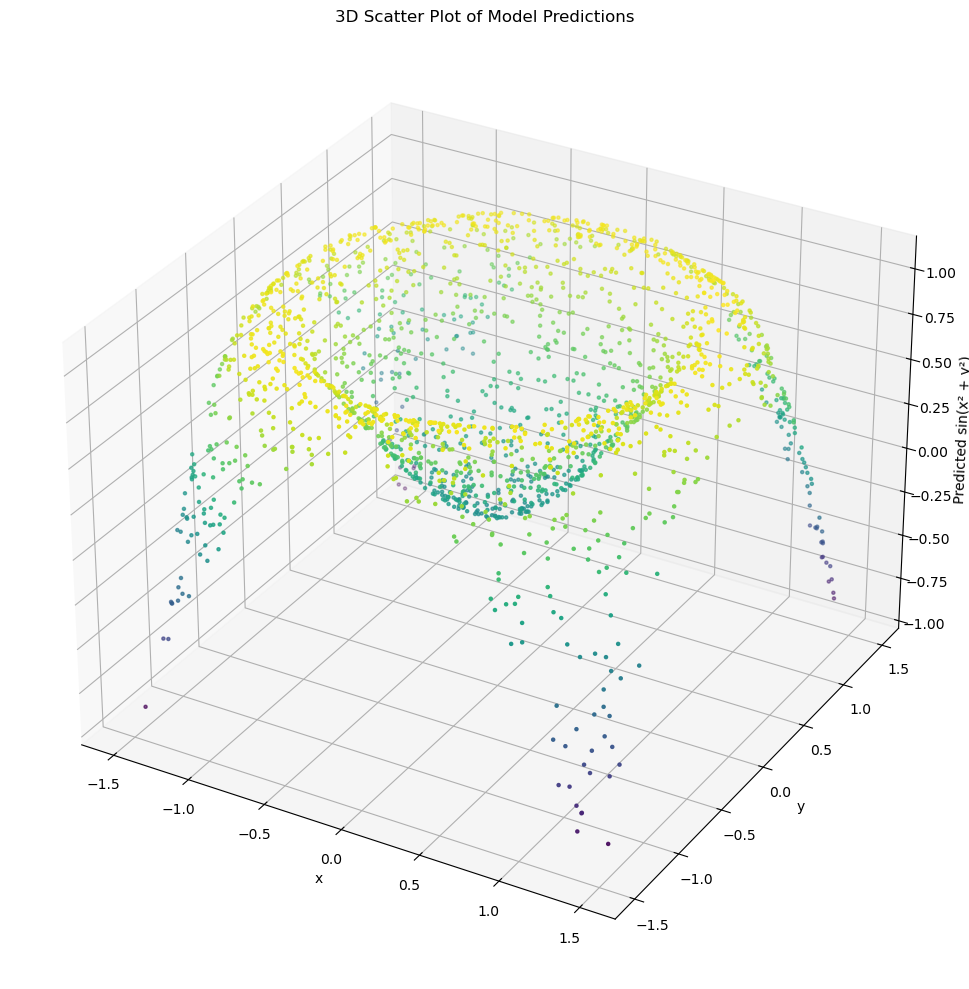

In [364]:
x_p = np.random.uniform(-3./2., 3./2., size=(2000,2))
y_p = model1.predict(x_p)

fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter points: x, y, prediction
ax.scatter(x_p[:, 0], x_p[:, 1], y_p.flatten(), c=y_p.flatten(), cmap='viridis', s=5)

# Labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Predicted sin(x² + y²)')
ax.set_title('3D Scatter Plot of Model Predictions')

plt.tight_layout()
plt.show()